# LightGBM Portfolio Performance Analysis

This notebook analyzes the decile portfolios created by `train_predict_data4.py`.

**Data**: `data4_portfolios.csv` contains average returns and predictions for 10 decile portfolios across 166 months (2012-02 to 2025-11).

**Analysis**:
1. Mean returns by decile (bar chart)
2. Sharpe ratios by decile (bar chart)
3. Cumulative returns (linear and log scale)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Data

In [2]:
# Load portfolio data
df = pd.read_csv('data4_portfolios.csv')

print(f"Shape: {df.shape}")
print(f"Date range: {df['month'].min()} to {df['month'].max()}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Shape: (1650, 4)
Date range: 2012-02 to 2025-10

Columns: ['month', 'decile', 'return', 'predict']

First few rows:


,month,decile,return,predict
0,2012-02,1,0.057712,0.408504
1,2012-02,2,0.046004,0.461471
2,2012-02,3,0.034312,0.479511
3,2012-02,4,0.040449,0.493579
4,2012-02,5,0.045661,0.506995


## 1. Mean Returns by Decile

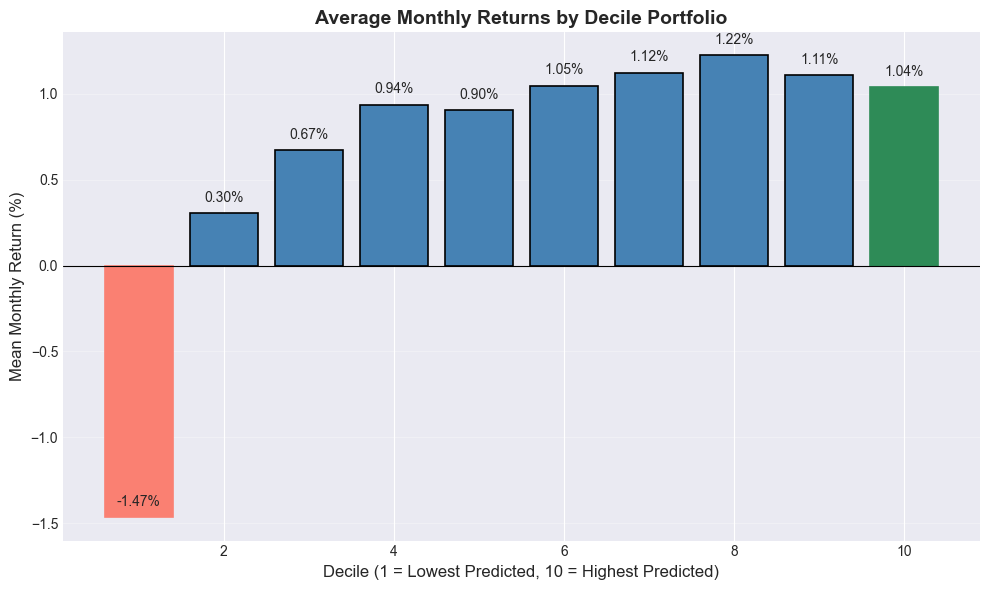


Mean Returns by Decile:
decile
1     -1.47%
2      0.30%
3      0.67%
4      0.94%
5      0.90%
6      1.05%
7      1.12%
8      1.22%
9      1.11%
10     1.04%
Name: return, dtype: object

Spread (D10 - D1): 2.50%


In [3]:
# Calculate mean return by decile
mean_returns = df.groupby('decile')['return'].mean()

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(mean_returns.index, mean_returns.values * 100, 
              color='steelblue', edgecolor='black', linewidth=1.2)

# Highlight extreme deciles
bars[0].set_color('salmon')
bars[-1].set_color('seagreen')

ax.set_xlabel('Decile (1 = Lowest Predicted, 10 = Highest Predicted)', fontsize=12)
ax.set_ylabel('Mean Monthly Return (%)', fontsize=12)
ax.set_title('Average Monthly Returns by Decile Portfolio', fontsize=14, fontweight='bold')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (decile, ret) in enumerate(mean_returns.items()):
    ax.text(decile, ret * 100 + 0.05, f'{ret*100:.2f}%', 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('decile_mean_returns.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nMean Returns by Decile:")
print(mean_returns.apply(lambda x: f"{x*100:.2f}%"))
print(f"\nSpread (D10 - D1): {(mean_returns.iloc[-1] - mean_returns.iloc[0])*100:.2f}%")

## 2. Sharpe Ratios by Decile

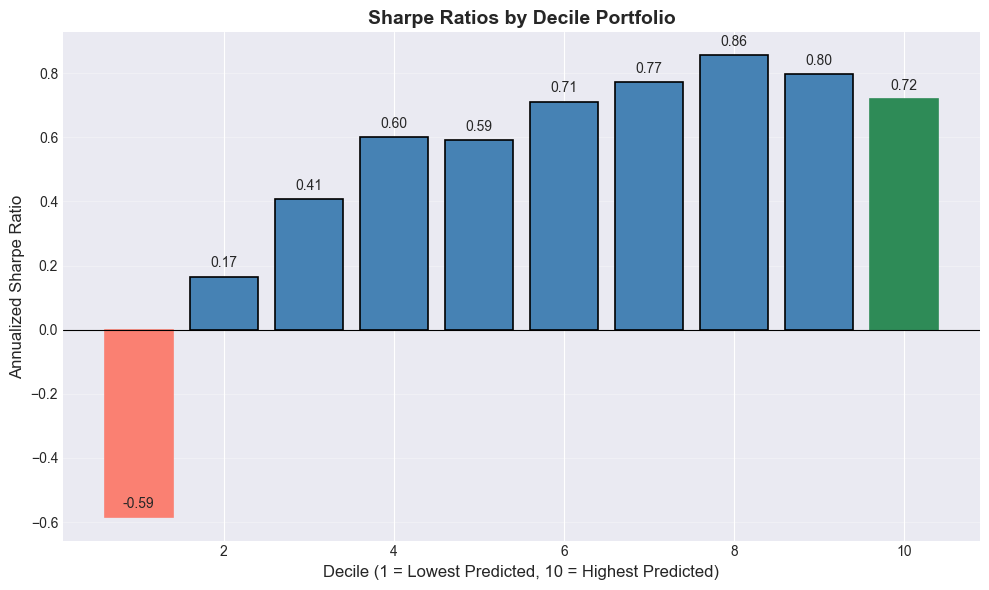


Annualized Sharpe Ratios by Decile:
decile
1     -0.59
2      0.17
3      0.41
4      0.60
5      0.59
6      0.71
7      0.77
8      0.86
9      0.80
10     0.72
Name: sharpe_annual, dtype: object


In [4]:
# Calculate Sharpe ratio by decile (mean / std)
sharpe_ratios = df.groupby('decile')['return'].agg(['mean', 'std'])
sharpe_ratios['sharpe'] = sharpe_ratios['mean'] / sharpe_ratios['std']

# Annualize Sharpe ratio (multiply by sqrt(12))
sharpe_ratios['sharpe_annual'] = sharpe_ratios['sharpe'] * np.sqrt(12)

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(sharpe_ratios.index, sharpe_ratios['sharpe_annual'], 
              color='steelblue', edgecolor='black', linewidth=1.2)

# Highlight extreme deciles
bars[0].set_color('salmon')
bars[-1].set_color('seagreen')

ax.set_xlabel('Decile (1 = Lowest Predicted, 10 = Highest Predicted)', fontsize=12)
ax.set_ylabel('Annualized Sharpe Ratio', fontsize=12)
ax.set_title('Sharpe Ratios by Decile Portfolio', fontsize=14, fontweight='bold')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for decile, sharpe in sharpe_ratios['sharpe_annual'].items():
    ax.text(decile, sharpe + 0.02, f'{sharpe:.2f}', 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('decile_sharpe_ratios.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nAnnualized Sharpe Ratios by Decile:")
print(sharpe_ratios['sharpe_annual'].apply(lambda x: f"{x:.2f}"))

## 3. Cumulative Returns (Linear and Log Scale)

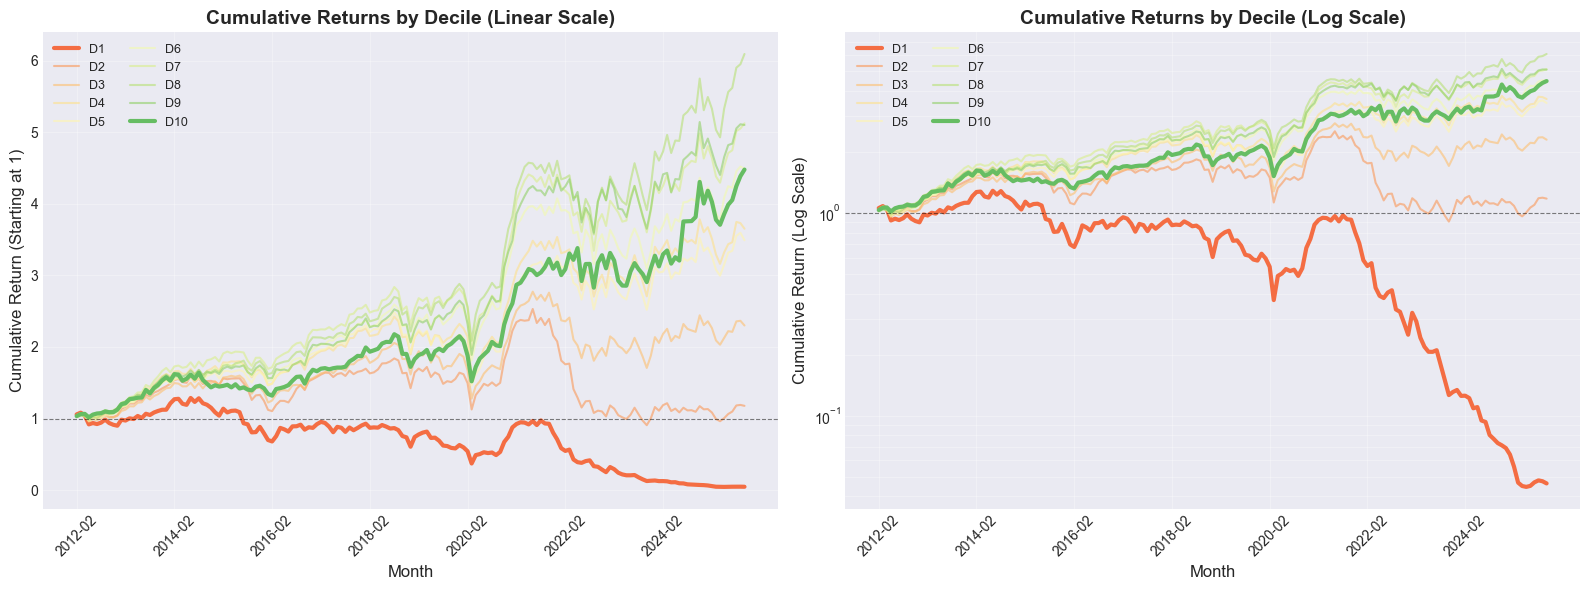


Final Cumulative Returns (as of 2025-10):
Decile 1: 0.05x (-95.4% total return)
Decile 2: 1.18x (17.7% total return)
Decile 3: 2.30x (130.1% total return)
Decile 4: 3.65x (265.3% total return)
Decile 5: 3.49x (249.2% total return)
Decile 6: 4.49x (349.1% total return)
Decile 7: 5.13x (412.7% total return)
Decile 8: 6.10x (509.6% total return)
Decile 9: 5.10x (410.4% total return)
Decile 10: 4.48x (348.0% total return)


In [5]:
# Pivot data to have deciles as columns
returns_wide = df.pivot(index='month', columns='decile', values='return')

# Calculate cumulative returns (compound growth)
cumulative_returns = (1 + returns_wide).cumprod()

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Define colors for deciles
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, 10))

# Plot 1: Linear scale
for i, decile in enumerate(cumulative_returns.columns):
    linewidth = 3 if decile in [1, 10] else 1.5
    alpha = 1.0 if decile in [1, 10] else 0.6
    ax1.plot(cumulative_returns.index, cumulative_returns[decile], 
             label=f'D{decile}', linewidth=linewidth, alpha=alpha, color=colors[i])

ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Cumulative Return (Starting at 1)', fontsize=12)
ax1.set_title('Cumulative Returns by Decile (Linear Scale)', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left', ncol=2, fontsize=9)
ax1.grid(alpha=0.3)
ax1.axhline(y=1, color='black', linestyle='--', linewidth=0.8, alpha=0.5)

# Rotate x-axis labels
ax1.tick_params(axis='x', rotation=45)
# Show fewer x-axis labels
xticks = cumulative_returns.index[::24]  # Every 24 months
ax1.set_xticks(xticks)

# Plot 2: Log scale
for i, decile in enumerate(cumulative_returns.columns):
    linewidth = 3 if decile in [1, 10] else 1.5
    alpha = 1.0 if decile in [1, 10] else 0.6
    ax2.semilogy(cumulative_returns.index, cumulative_returns[decile], 
                 label=f'D{decile}', linewidth=linewidth, alpha=alpha, color=colors[i])

ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Cumulative Return (Log Scale)', fontsize=12)
ax2.set_title('Cumulative Returns by Decile (Log Scale)', fontsize=14, fontweight='bold')
ax2.legend(loc='upper left', ncol=2, fontsize=9)
ax2.grid(alpha=0.3, which='both')
ax2.axhline(y=1, color='black', linestyle='--', linewidth=0.8, alpha=0.5)

# Rotate x-axis labels
ax2.tick_params(axis='x', rotation=45)
ax2.set_xticks(xticks)

plt.tight_layout()
plt.savefig('decile_cumulative_returns.png', dpi=300, bbox_inches='tight')
plt.show()

# Print final cumulative returns
print(f"\nFinal Cumulative Returns (as of {cumulative_returns.index[-1]}):")
final_returns = cumulative_returns.iloc[-1]
for decile, cum_ret in final_returns.items():
    print(f"Decile {decile}: {cum_ret:.2f}x ({(cum_ret-1)*100:.1f}% total return)")

## Summary Statistics

In [6]:
# Create summary table
summary = df.groupby('decile')['return'].agg([
    ('Mean', lambda x: x.mean() * 100),
    ('Std', lambda x: x.std() * 100),
    ('Sharpe (Annual)', lambda x: (x.mean() / x.std()) * np.sqrt(12)),
    ('Min', lambda x: x.min() * 100),
    ('Max', lambda x: x.max() * 100)
])

# Add final cumulative return
summary['Final Cumulative'] = cumulative_returns.iloc[-1].values

print("\n" + "="*80)
print("SUMMARY STATISTICS BY DECILE")
print("="*80)
print(summary.round(2))

# Long-short portfolio (D10 - D1)
long_short = df.pivot(index='month', columns='decile', values='return')
long_short['spread'] = long_short[10] - long_short[1]

print("\n" + "="*80)
print("LONG-SHORT PORTFOLIO (D10 - D1)")
print("="*80)
print(f"Mean Monthly Return: {long_short['spread'].mean()*100:.2f}%")
print(f"Volatility: {long_short['spread'].std()*100:.2f}%")
print(f"Sharpe Ratio (Annual): {(long_short['spread'].mean() / long_short['spread'].std()) * np.sqrt(12):.2f}")
print(f"Final Cumulative Return: {(1 + long_short['spread']).prod():.2f}x")


SUMMARY STATISTICS BY DECILE
        Mean   Std  Sharpe (Annual)    Min    Max  Final Cumulative
decile                                                             
1      -1.47  8.68            -0.59 -31.51  31.55              0.05
2       0.30  6.37             0.17 -24.65  21.41              1.18
3       0.67  5.70             0.41 -23.63  18.06              2.30
4       0.94  5.39             0.60 -25.76  19.50              3.65
5       0.90  5.30             0.59 -26.03  17.41              3.49
6       1.05  5.10             0.71 -23.38  16.54              4.49
7       1.12  5.04             0.77 -21.94  18.89              5.13
8       1.22  4.95             0.86 -18.50  17.48              6.10
9       1.11  4.81             0.80 -18.58  17.73              5.10
10      1.04  5.00             0.72 -19.16  17.04              4.48

LONG-SHORT PORTFOLIO (D10 - D1)
Mean Monthly Return: 2.50%
Volatility: 6.68%
Sharpe Ratio (Annual): 1.30
Final Cumulative Return: 41.38x
